## Model Selection

This notebook should include preliminary and baseline modeling.
- Try as many different models as possible.
- Don't worry about hyperparameter tuning or cross validation here.
- Ideas include:
    - linear regression
    - support vector machines
    - random forest
    - xgboost

In [111]:
# import models and fit

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [112]:
# Import train/test sets 

train_df = pd.read_csv('../processed_data/train_df.csv')
test_df = pd.read_csv('../processed_data/test_df.csv')

X_train = train_df.drop(columns='sold_price')
y_train = train_df['sold_price']
X_test = test_df.drop(columns='sold_price')
y_test = test_df['sold_price']

In [113]:
from sklearn.model_selection import train_test_split

X = train_df[["year_built", "building_ratio", "total_sqft", "encoded_city", "garage", "stories", "beds"]]  # Feature
y = train_df["sold_price"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [114]:
model = LinearRegression()  # Initialize model
model.fit(X_train, y_train)  # Train the model

LinearRegression()

In [115]:
y_pred = model.predict(X_test)

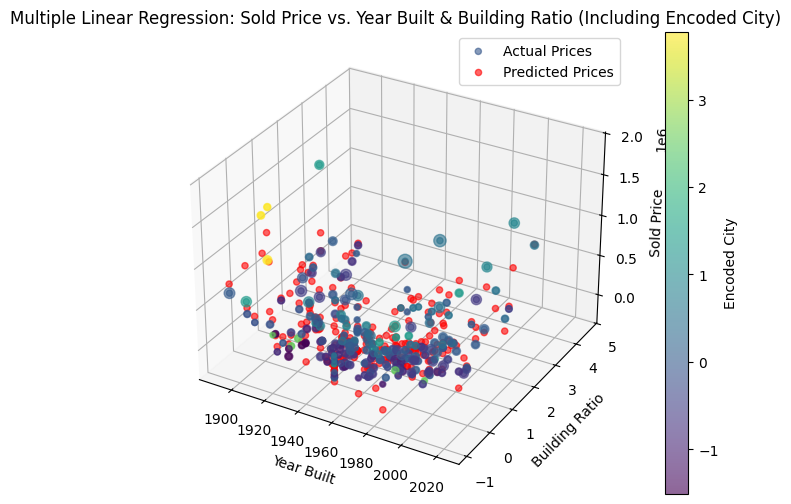

In [116]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection="3d")

# Use encoded_city as the color scale (mapping city values to colors)
colors = X_test["encoded_city"]  # Assign colors based on encoded city values

# Actual Prices
sc = ax.scatter(X_test["year_built"], X_test["building_ratio"], y_test, 
                c=colors, cmap="viridis", label="Actual Prices", alpha=0.6)

# Predicted Prices
ax.scatter(X_test["year_built"], X_test["building_ratio"], y_pred, 
           color="red", label="Predicted Prices", alpha=0.6)

# Add color bar for encoded_city representation
cbar = fig.colorbar(sc)
cbar.set_label("Encoded City")

# Adjust marker size based on total_sqft for better visualization
marker_sizes = np.interp(X_test["total_sqft"], (X_test["total_sqft"].min(), X_test["total_sqft"].max()), (10, 100))
ax.scatter(X_test["year_built"], X_test["building_ratio"], y_test, 
           c=colors, cmap="viridis", s=marker_sizes, alpha=0.6)

# Label axes
ax.set_xlabel("Year Built")
ax.set_ylabel("Building Ratio")
ax.set_zlabel("Sold Price")
ax.legend()
plt.title("Multiple Linear Regression: Sold Price vs. Year Built & Building Ratio (Including Encoded City)")
plt.show()

In [117]:
# Evaluation Metrics 
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: ${mae:,.2f}")



Mean Squared Error: 55286464174.43
R² Score: 0.43
Mean Absolute Error: $151,410.45


In [118]:
# Define features and target variable
features = ["year_built", "building_ratio", "sqft", "encoded_city", "garage", "stories", "beds"]
X_train = train_df[features]
y_train = train_df["sold_price"]
X_test = test_df[features]
y_test = test_df["sold_price"]


In [119]:
# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.03, max_depth=5, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [131]:
# Predict sold prices
y_pred_xgb = xgb_model.predict(X_test)

# Compute evaluation metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5  # Convert to original units
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Mean Absolute Error: ${mae_xgb:,.2f}")
print(f"Root Mean Squared Error: ${rmse_xgb:,.2f}")
print(f"R² Score: {r2_xgb:.2f}")

Mean Absolute Error: $95,876.97
Root Mean Squared Error: $188,629.67
R² Score: 0.61


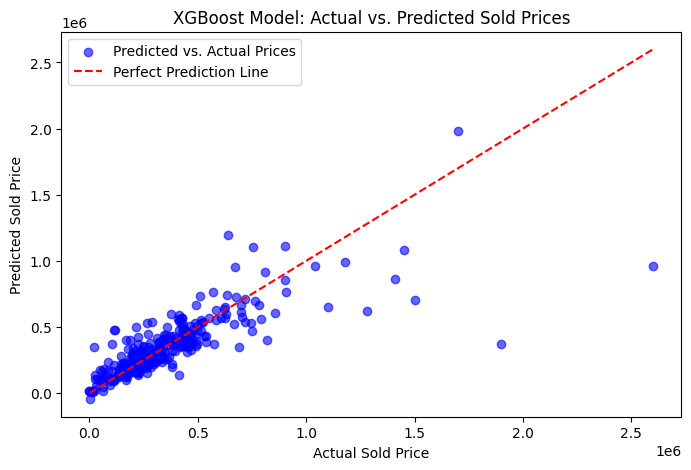

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color="blue", label="Predicted vs. Actual Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Perfect Prediction Line")

plt.xlabel("Actual Sold Price")
plt.ylabel("Predicted Sold Price")
plt.legend()
plt.title("XGBoost Model: Actual vs. Predicted Sold Prices")
plt.show()

### Random Forest

In [122]:
rfc = RandomForestRegressor(n_estimators=100, random_state=3)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 196497.12
R^2 Score: 0.57
MAE: 97171.21


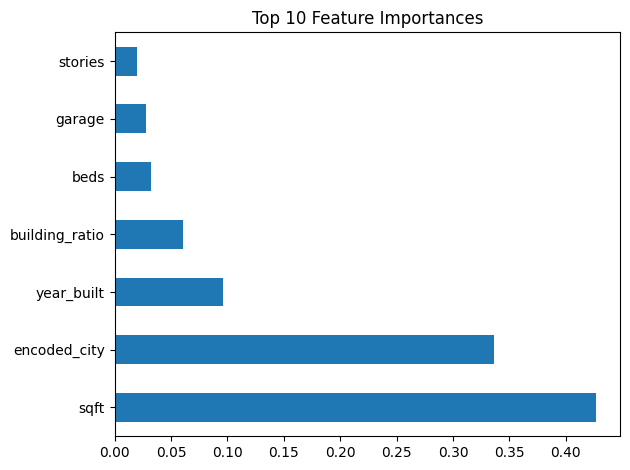

In [123]:
feat_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

In [124]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

### K-Nearest Neighbors 

In [125]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 259243.99
R^2 Score: 0.26
MAE: 145165.42


### SVR

In [126]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 305003.43
R^2 Score: -0.03
MAE: 190197.95


In [127]:
# Define models and predictions
models = {
    "Linear Regression": y_pred,
    "XGBoost": y_pred_xgb,
    "Random Forest": rfc.predict(X_test),
    "KNN": knn.predict(X_test),
    "SVR": model.predict(X_test)
}

In [128]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define models and predictions
models = {
    "Linear Regression": y_pred,
    "XGBoost": y_pred_xgb,
    "Random Forest": rfc.predict(X_test),
    "KNN": knn.predict(X_test),
    "SVR": model.predict(X_test)
}

# Compile evaluation metrics into a dictionary
evaluation_results = {}

for model_name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    n = X_test.shape[0]  # Number of observations
    p = X_test.shape[1]  # Number of predictors
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    evaluation_results[model_name] = [mse, rmse, mae, r2, adjusted_r2]

# Convert results into a DataFrame for easy comparison
results_df = pd.DataFrame.from_dict(
    evaluation_results, 
    orient="index", 
    columns=["MSE", "RMSE", "MAE", "R² Score", "Adjusted R² Score"]
)

# Print results
print(results_df)



                            MSE           RMSE            MAE  R² Score  \
Linear Regression  9.302709e+10  305003.429445  190197.952167 -0.027365   
XGBoost            3.558115e+10  188629.674373   95876.971788  0.607052   
Random Forest      3.861112e+10  196497.115328   97171.214406  0.573590   
KNN                6.720745e+10  259243.987860  145165.417361  0.257780   
SVR                9.302709e+10  305003.429445  190197.952167 -0.027365   

                   Adjusted R² Score  
Linear Regression          -0.053049  
XGBoost                     0.597228  
Random Forest               0.562930  
KNN                         0.239225  
SVR                        -0.053049  


Consider what metrics you want to use to evaluate success.
- If you think about mean squared error, can we actually relate to the amount of error?
- Try root mean squared error so that error is closer to the original units (dollars)
- What does RMSE do to outliers?
- Is mean absolute error a good metric for this problem?
- What about R^2? Adjusted R^2?
- Briefly describe your reasons for picking the metrics you use

## Feature Selection - STRETCH

> **This step doesn't need to be part of your Minimum Viable Product (MVP), but its recommended you complete it if you have time!**

Even with all the preprocessing we did in Notebook 1, you probably still have a lot of features. Are they all important for prediction?

Investigate some feature selection algorithms (Lasso, RFE, Forward/Backward Selection)
- Perform feature selection to get a reduced subset of your original features
- Refit your models with this reduced dimensionality - how does performance change on your chosen metrics?
- Based on this, should you include feature selection in your final pipeline? Explain

Remember, feature selection often doesn't directly improve performance, but if performance remains the same, a simpler model is often preferrable. 



In [129]:
# perform feature selection 
# refit models
# gather evaluation metrics and compare to the previous step (full feature set)